In [1]:
# -------------- NLTK: pretrained "SentimentIntensityAnalyzer"-------------------------

In [2]:
import pandas as pd
# Load the Sentiment140 dataset as a data frame
# Print the first 5 rows of the data frame
use_cols = ['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text']
data = pd.read_csv('tweets.csv', index_col=None, usecols=use_cols)
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...


In [3]:
data["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Now lets start to work with NLTK and see the results:

In [4]:
import nltk # make sure to download the lexicone
nltk.downloader.download('vader_lexicon', quiet=True);

Examples:

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment_intensity_analyzer = SentimentIntensityAnalyzer()
print(sentiment_intensity_analyzer.polarity_scores('I love my smartphone'))

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}


compound: a normalized score between -1 and 1, which indicates the overall sentiment of the text.

pos, neg, neu: the positive, negative and neutral sentiment scores respectively.

In [6]:
print(sentiment_intensity_analyzer.polarity_scores('I love my smartphone very much!'))

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.6696}


In [7]:
print(sentiment_intensity_analyzer.polarity_scores('Fraud'))

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5859}


In [8]:
print(sentiment_intensity_analyzer.polarity_scores("It's too good to be true"))

{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.6908}


In [9]:
print(sentiment_intensity_analyzer.polarity_scores("is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"))

{'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.75}


A positive compound score indicates a positive overall sentiment, a negative compound score indicates a negative overall sentiment, and a score of 0 indicates a neutral overall sentiment. Now let's chek it on our data samples

Now let's check the model on our results:

But the question is, how we can summarize this dictionary, for example: {'neg': 0.303, 'neu': 0.697, 'pos': 0.0, 'compound': -0.75} in order to have one answer? I want the result will be Negative, Positive or Neutral and not a dictionary. Let's try it with thresold of 0.05:

In [10]:
def summarize_sentiment(scores):
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [11]:
scores = sentiment_intensity_analyzer.polarity_scores("I love this product!")
print(summarize_sentiment(scores)) 

Positive


Let's implement that model on our texts:

In [12]:
# Get sentiment score for each review
data['scores_NLTK'] = data['text'].apply(lambda x: sentiment_intensity_analyzer.polarity_scores(x))
data['scores_NLTK'].describe()

count                                                 14640
unique                                                 8122
top       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
freq                                                   3223
Name: scores_NLTK, dtype: object

In [13]:
data['summary'] = data['scores_NLTK'].apply(lambda x: summarize_sentiment(x))
data

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,scores_NLTK,summary
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,"{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...",Negative
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,"{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'comp...",Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",Positive
14636,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",Negative
14637,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",Positive
14638,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...","{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",Positive


Let's check the results:

In [14]:
import nbformat.v4 as nbformat
from sklearn import metrics
# Compute the precision, recall, and F1 score
labels_test=data["airline_sentiment"]
data['summary'] = data['summary'].apply(lambda x: x.lower())
predictions=data['summary']

precision_micro = metrics.precision_score(labels_test, predictions, average="micro")
precision_macro = metrics.precision_score(labels_test, predictions, average="macro")
precision_weighted = metrics.precision_score(labels_test, predictions, average="weighted")
recall = metrics.recall_score(labels_test, predictions,average="weighted")
f1 = metrics.f1_score(labels_test, predictions, average="weighted")
# auc=metrics.roc_auc_score(labels_test, predictions)
cm = metrics.confusion_matrix(labels_test,predictions)
# # Print the results
print('Precision(micro):', precision_micro)
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
print('Precision(macro):', precision_macro)
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print('Precision(weighted):', precision_weighted)

print('Recall:', recall)
print('F1 score:', f1)
# print('AUC score:', auc)
print('Confusion Matrix', cm)

Precision(micro): 0.542827868852459
Precision(macro): 0.5397306221951211
Precision(weighted): 0.6985683472029285
Recall: 0.542827868852459
F1 score: 0.5653261711946944
Confusion Matrix [[4563 1905 2710]
 [ 431 1325 1343]
 [  89  215 2059]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

    negative       0.90      0.50      0.64      9178
     neutral       0.38      0.43      0.40      3099
    positive       0.34      0.87      0.49      2363

    accuracy                           0.54     14640
   macro avg       0.54      0.60      0.51     14640
weighted avg       0.70      0.54      0.57     14640



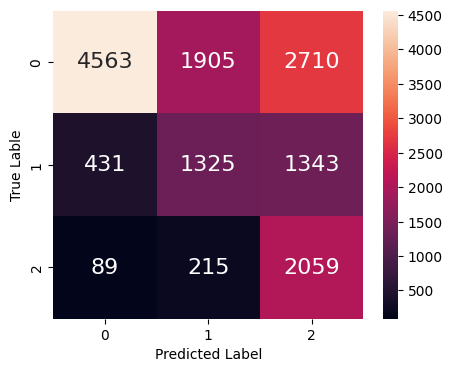

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16})
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

In [17]:
data["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [18]:
data["summary"].value_counts()

positive    6112
negative    5083
neutral     3445
Name: summary, dtype: int64

In [19]:
class_names = ["Negative", "Neutral", "Positive"]
df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)

In [20]:
df_cm 

,Negative,Neutral,Positive
Negative,4563,1905,2710
Neutral,431,1325,1343
Positive,89,215,2059


NLTK: pretrained "SentimentIntensityAnalyzer" made multiple mistakes. In my opinion it happen becouse of the threshold I need to choose. At the end what we can do is to low the threshold for negative or positive, or combine positive and negative with neutral score ( and there is a lot of other options). 

Change the threshold to 0.2:

In [21]:
def summarize_sentiment(scores):
    if scores['compound'] >= 0.2:
        return "Positive"
    elif scores['compound'] <= -0.2:
        return "Negative"
    else:
        return "Neutral"

In [22]:
scores = sentiment_intensity_analyzer.polarity_scores("I love this product!")
print(summarize_sentiment(scores)) 

Positive


In [23]:
# Get sentiment score for each review
data['scores_NLTK'] = data['text'].apply(lambda x: sentiment_intensity_analyzer.polarity_scores(x))
data['scores_NLTK'].describe()

count                                                 14640
unique                                                 8122
top       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
freq                                                   3223
Name: scores_NLTK, dtype: object

In [24]:
data['summary'] = data['scores_NLTK'].apply(lambda x: summarize_sentiment(x))
data

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,scores_NLTK,summary
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,"{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...",Negative
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,"{'neg': 0.321, 'neu': 0.679, 'pos': 0.0, 'comp...",Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",Positive
14636,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",Negative
14637,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",Positive
14638,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...","{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",Positive


In [25]:
import nbformat.v4 as nbformat
from sklearn import metrics
# Compute the precision, recall, and F1 score
labels_test=data["airline_sentiment"]
data['summary'] = data['summary'].apply(lambda x: x.lower())
predictions=data['summary']

precision_micro = metrics.precision_score(labels_test, predictions, average="micro")
precision_macro = metrics.precision_score(labels_test, predictions, average="macro")
precision_weighted = metrics.precision_score(labels_test, predictions, average="weighted")
recall = metrics.recall_score(labels_test, predictions,average="weighted")
f1 = metrics.f1_score(labels_test, predictions, average="weighted")
# auc=metrics.roc_auc_score(labels_test, predictions)
cm = metrics.confusion_matrix(labels_test,predictions)
# # Print the results
print('Precision(micro):', precision_micro)
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
print('Precision(macro):', precision_macro)
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print('Precision(weighted):', precision_weighted)

print('Recall:', recall)
print('F1 score:', f1)
# print('AUC score:', auc)
print('Confusion Matrix', cm)

Precision(micro): 0.5298497267759563
Precision(macro): 0.5407337365543334
Precision(weighted): 0.7030271542285867
Recall: 0.5298497267759563
F1 score: 0.549293588567855
Confusion Matrix [[4162 2806 2210]
 [ 335 1562 1202]
 [  70  260 2033]]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

    negative       0.91      0.45      0.61      9178
     neutral       0.34      0.50      0.40      3099
    positive       0.37      0.86      0.52      2363

    accuracy                           0.53     14640
   macro avg       0.54      0.61      0.51     14640
weighted avg       0.70      0.53      0.55     14640



In [26]:
class_names = ["Negative", "Neutral", "Positive"]
df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
df_cm 

,Negative,Neutral,Positive
Negative,4162,2806,2210
Neutral,335,1562,1202
Positive,70,260,2033


Short Summary:

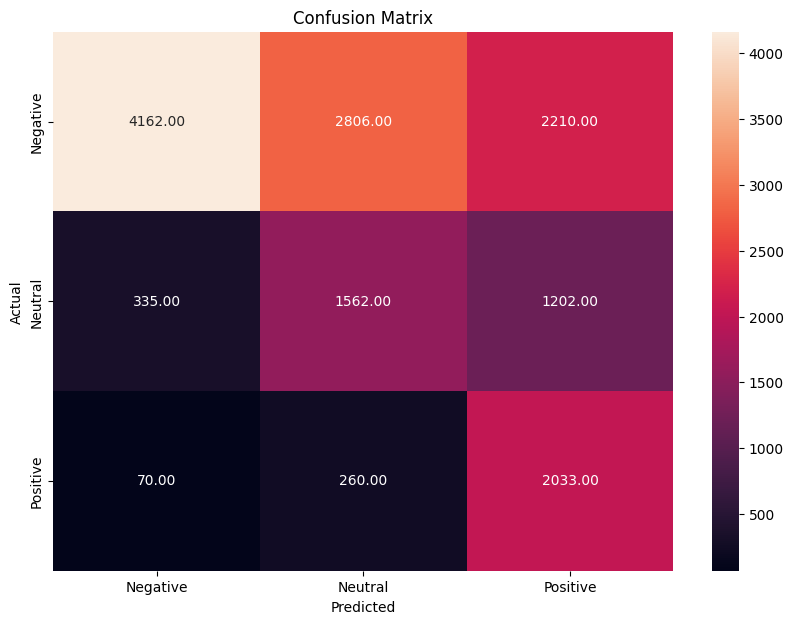

In [27]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

class_names = ["Negative", "Neutral", "Positive"]
cm = [[4162, 2806, 2210], [ 335, 1562, 1202], [  70,  260, 2033]]
df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)

plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot = True, fmt = '.2f')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

It looks like it improved the precision but lowered the recall. It appears that the natural language processing (NLP) library NLTK is not accurately recognizing the sentiment of the text in the file.The main reason is not the model it's self, but the difficulty to make a decision. Now, we not always want to make specific desicion, for example in finance, when we want to make a sentiment analysis of the questions of analyst ask in earning calls. Maybe here we would like to have those 3 values in front of us, and then make a decision (hold, sell or buy). So this model will suit us well. But specifically in this project i want to recognize the sentiment of the text, where it will make a decision automatically - if it's positive, negative or neutral. Maybe because of the laziness, or maybe because this model doesn't fit, I would prefer to move to examine another models.